# HW6 Q3

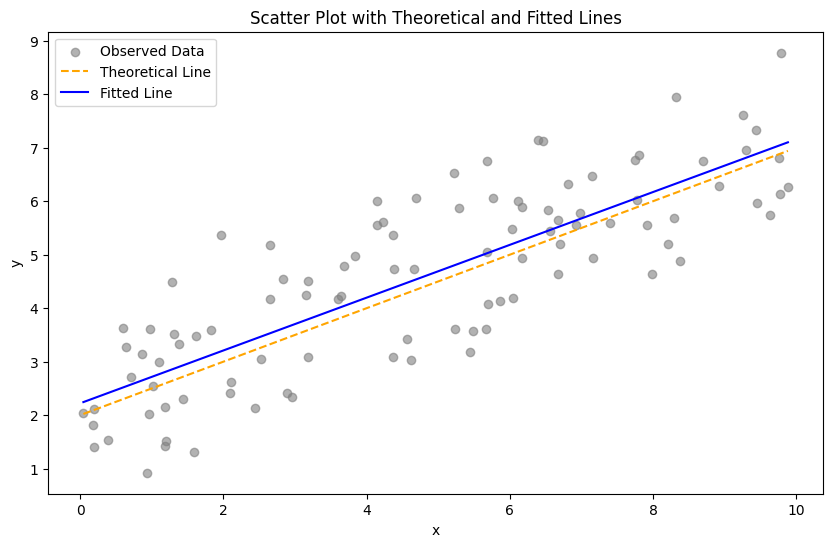

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Set seed for reproducibility
np.random.seed(0)

# Step 1: Define parameters for the theoretical model
beta_0 = 2.0  # Intercept
beta_1 = 0.5  # Slope
sigma = 1.0   # Standard deviation of noise
n_points = 100  # Number of data points

# Step 2: Generate random x values and calculate corresponding y values with added noise
x = np.random.rand(n_points) * 10  # Random x values between 0 and 10
epsilon = np.random.normal(0, sigma, n_points)  # Random noise
y_theoretical = beta_0 + beta_1 * x  # Theoretical y values without noise
y_observed = y_theoretical + epsilon  # Observed y values with noise

# Step 3: Create a DataFrame to store the data
df = pd.DataFrame({'x': x, 'y': y_observed})

# Step 4: Fit a linear regression model using OLS
X = sm.add_constant(df['x'])  # Add intercept term to x
model = sm.OLS(df['y'], X).fit()  # Fit the model
fitted_line_params = model.params  # Get the fitted parameters

# Step 5: Plot the data and both lines
plt.figure(figsize=(10, 6))

# Scatter plot of observed data
plt.scatter(df['x'], df['y'], color='gray', label='Observed Data', alpha=0.6)

# Theoretical line (without noise)
x_range = np.linspace(df['x'].min(), df['x'].max(), 100)
y_theoretical_line = beta_0 + beta_1 * x_range
plt.plot(x_range, y_theoretical_line, 'orange', linestyle='--', label='Theoretical Line')

# Fitted line
y_fitted_line = fitted_line_params.iloc[0] + fitted_line_params.iloc[1] * x_range
plt.plot(x_range, y_fitted_line, 'blue', label='Fitted Line')

# Labels and legend
plt.title('Scatter Plot with Theoretical and Fitted Lines')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show plot
plt.show()


**Notice** 
- The orange dashed line represents the `Theoretical Line` from Q1
- The blue line represents the `Fitted Line` from Q2

## Explain the Difference between two lines
- The theoretical line is based on the true relationship defined by the model $Y=β_0+β_1*x$
- However, the fitted line is calculated from the observed (generated) data, which includes random sampling variation. As a result, it's shifted from the theoretical line

## GPT's summary
- https://chatgpt.com/share/67200f91-3a54-8006-b637-b7c78dda2ee6

# HW6 Q4

In [3]:
print('model.summary().tables[1]: ')
print(model.summary().tables[1])
print('\nmodel.params: ')
print(model.params)
print('\nmodel.params.values: ')
print(model.params.values)

model.summary().tables[1]: 
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2222      0.193     11.496      0.000       1.839       2.606
x              0.4937      0.035     14.144      0.000       0.424       0.563

model.params: 
const    2.222151
x        0.493694
dtype: float64

model.params.values: 
[2.22215108 0.4936935 ]


As we can see, we basically get two constants which are the predicted x-intercept ($\hat{β_0}$) and predicted slope ($\hat{β_1}$)

## How `fitted_model.fittedvalues` are derived?

- Basically, we need to use the formula $\hat{y_i}=\hat{β_0}+\hat{β_1}*x_i$. Notice: $\hat{β_0}$ and $\hat{β_1}$ are known from our model summary, and $x_i$ is exactly the $x_i$ from our sample, but $\hat{y_i}$ is the predicted value where $Y_i$ stands for our theoretical "true" value ($Y_i=β_0+β_1*x_i$)
- By the way, $\hat{y_i}$ is obviously different from $Y_i$ since our $\hat{β_0}$ and $\hat{β_1}$ are different from $β_0$ and $β_1$

## GPT's summary
- https://chatgpt.com/share/67214d0b-b1bc-8006-bda4-1e7ac1c39a03

# HW6 Q9

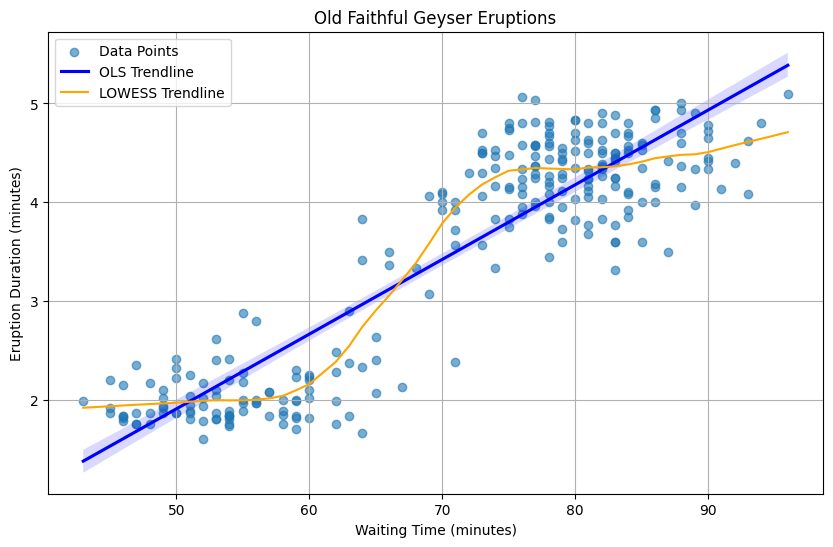

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(old_faithful['waiting'], old_faithful['duration'], alpha=0.6, label='Data Points')

# Fit a linear regression model and plot the regression line
sns.regplot(x='waiting', y='duration', data=old_faithful, scatter=False, color='blue', label='OLS Trendline')

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])

# Plot the LOWESS trendline
plt.plot(smoothed_df['waiting'], smoothed_df['smoothed_duration'], color='orange', label='LOWESS Trendline')

# Set plot title and labels
plt.title("Old Faithful Geyser Eruptions")
plt.xlabel("Waiting Time (minutes)")
plt.ylabel("Eruption Duration (minutes)")
plt.legend()
plt.grid()

# Show the plot
plt.show()  # Use plt.savefig('filename.png') for saving


                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.410
Date:                Tue, 29 Oct 2024   Prob (F-statistic):              0.238
Time:                        17:18:10   Log-Likelihood:                 2.3238
No. Observations:                  83   AIC:                           -0.6475
Df Residuals:                      81   BIC:                             4.190
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.0

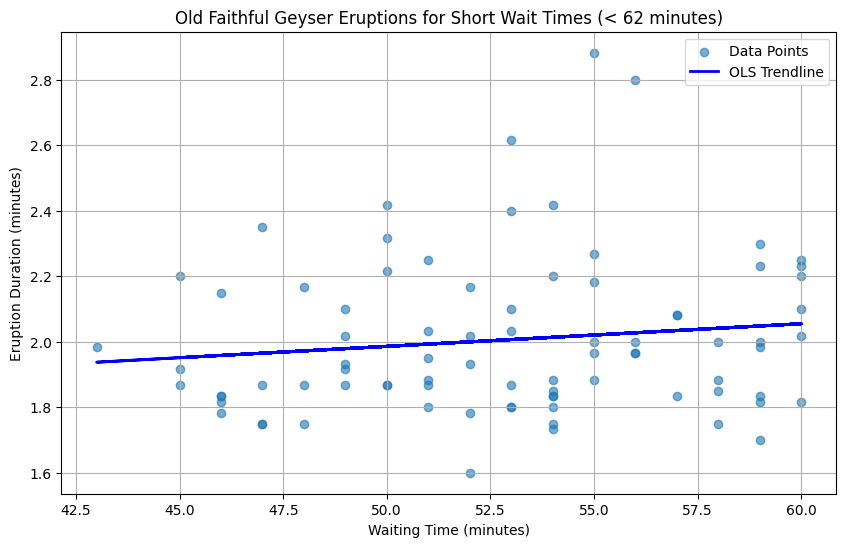





                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     4.523
Date:                Tue, 29 Oct 2024   Prob (F-statistic):             0.0363
Time:                        17:18:10   Log-Likelihood:                -3.4244
No. Observations:                  90   AIC:                             10.85
Df Residuals:                      88   BIC:                             15.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915     

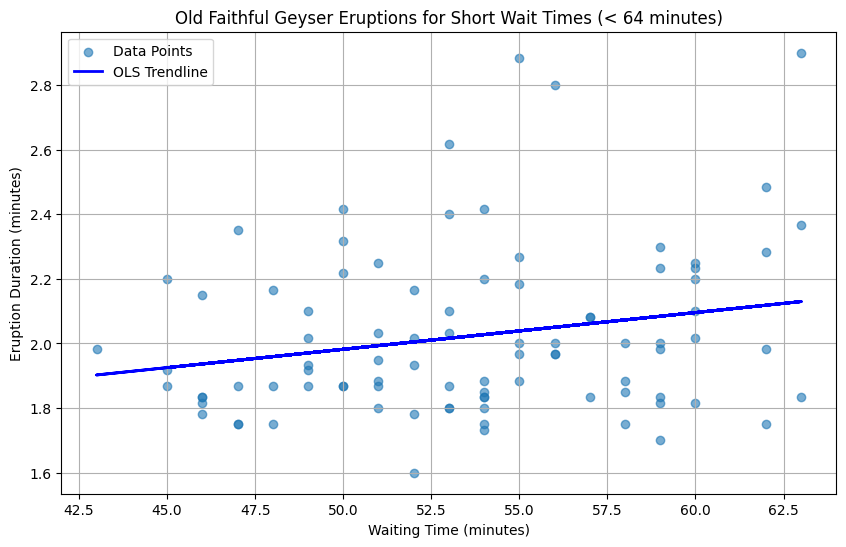





                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     13.72
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           0.000356
Time:                        17:18:10   Log-Likelihood:                -28.737
No. Observations:                  97   AIC:                             61.47
Df Residuals:                      95   BIC:                             66.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637     

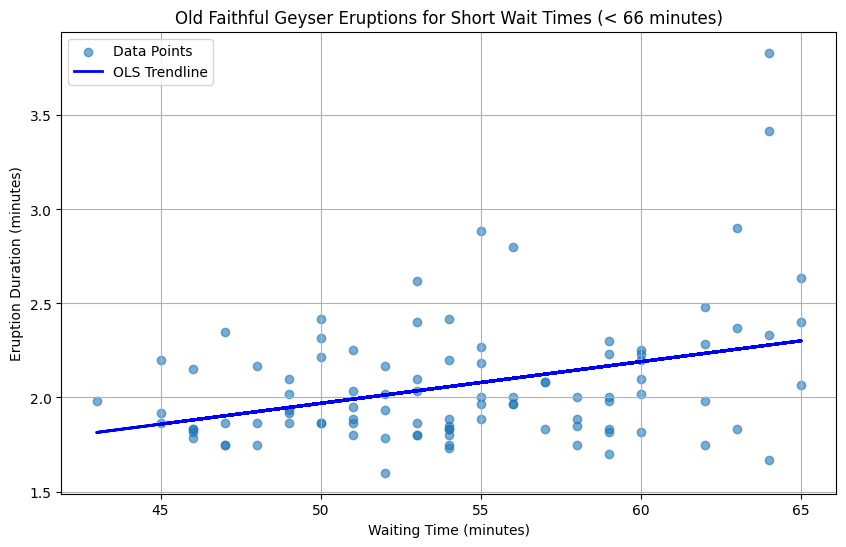

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Load the Old Faithful dataset
old_faithful = sns.load_dataset('geyser')

# Define short wait limits (you can change this value to 62, 64, or 66)
short_wait_limits = [62, 64, 66]

for i in range(3):
    # Filter dataset for short wait times
    short_wait = old_faithful['waiting'] < short_wait_limits[i]

    # Fit the OLS model
    model = smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit()

    # Print the regression summary
    print(model.summary())

    # Create a scatter plot with the OLS trendline
    plt.figure(figsize=(10, 6))
    plt.scatter(old_faithful[short_wait]['waiting'], old_faithful[short_wait]['duration'], 
                alpha=0.6, label='Data Points')

    # Plotting the regression line
    waiting_vals = old_faithful[short_wait]['waiting']
    predicted_duration = model.predict(old_faithful[short_wait])
    plt.plot(waiting_vals, predicted_duration, color='blue', label='OLS Trendline', linewidth=2)

    # Set plot title and labels
    plt.title(f"Old Faithful Geyser Eruptions for Short Wait Times (< {short_wait_limits[i]} minutes)")
    plt.xlabel("Waiting Time (minutes)")
    plt.ylabel("Eruption Duration (minutes)")
    plt.legend()
    plt.grid()

    # Show the plot
    plt.show()  # Use plt.savefig('filename.png') for saving if needed
    if i != 2:
        print('\n\n\n')


## $\hat{β_0}$ and $\hat{β_1}$ Summary
|Wait Time|$\hat{β_0}$|$\hat{β_1}$|
|:-|:-|:-|
|<62|1.6401|0.0069|
|<64|1.4140|0.0114|
|<66|0.8619|0.0221|

Now we want to do three individual hypothesis testings to judge is there a relationship between duration and wait time.

## Hypothesis
- $H_0$: $|\hat{β_1}|$=0 (no linear association)
- $H_1$: $|\hat{β_1}|$>0

## Testing
- Firstly, we want to get the sampling distribution under $H_0$ by bootstrapping with random shuffling technique to eliminate potential linear association so we can then ensure it's under $H_0$ (also there will be three sampling distributions where wait time <62, <64, and <66)
- Use our $\hat{β_{1_i}}$ from the summary as the t-statistic to obtain the p-value
- Use p-values to get three conclusions for each hypothesis testing

Observed slope (β1) for wait time < 62: 0.006918248785480558
P-value for wait time < 62: 0.233


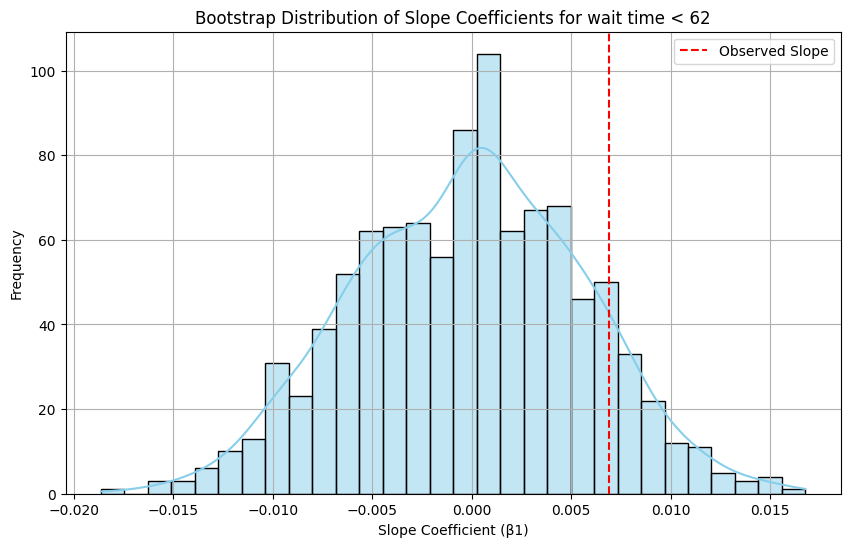

Observed slope (β1) for wait time < 64: 0.011362632237794832
P-value for wait time < 64: 0.031


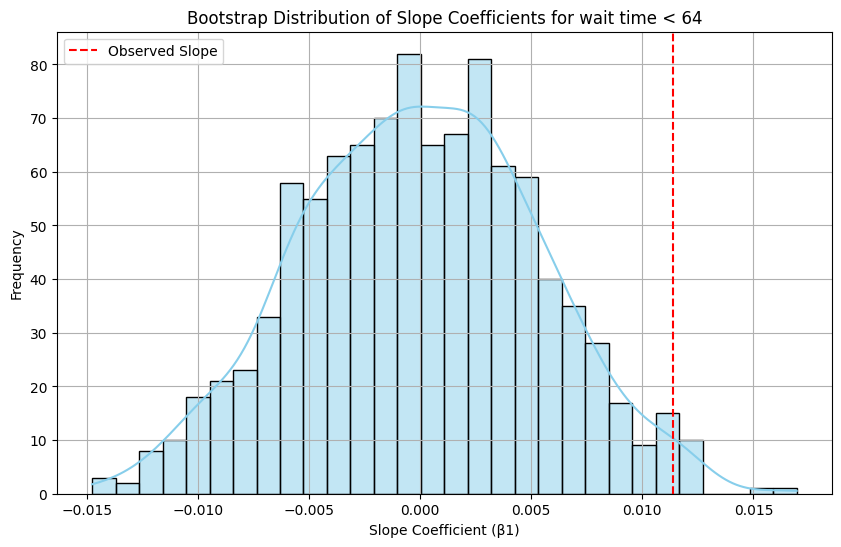

Observed slope (β1) for wait time < 66: 0.022143915538652362
P-value for wait time < 66: 0.001


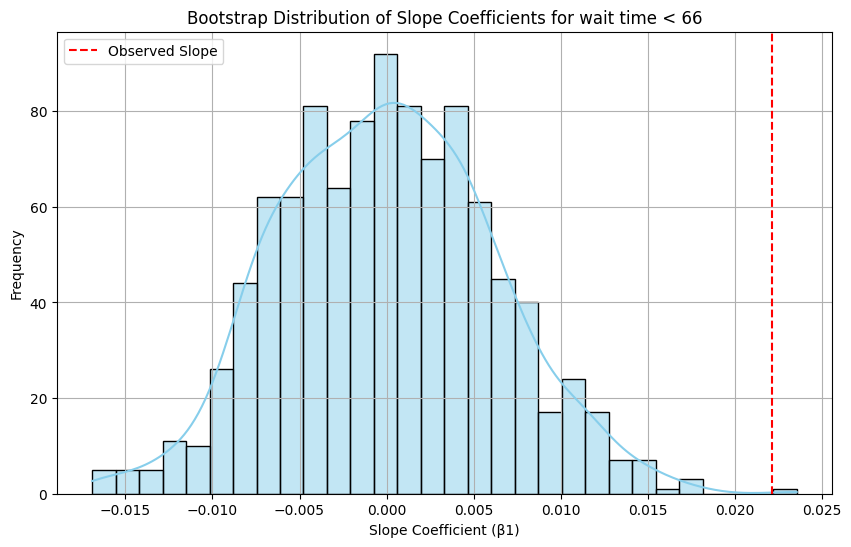

In [10]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Old Faithful dataset
old_faithful = sns.load_dataset('geyser')

# Define wait time limits
wait_time_limits = [62, 64, 66]

# Function to perform bootstrapping for a given wait time limit
def bootstrap_test(limit, data, n_iterations=1000):
    # Filter data for wait times less than the limit
    short_wait = data[data['waiting'] < limit]

    # Original OLS model to get the observed slope
    model = sm.OLS(short_wait['duration'], sm.add_constant(short_wait['waiting'])).fit()
    observed_slope = model.params['waiting']
    print(f'Observed slope (β1) for wait time < {limit}: {observed_slope}')

    # Bootstrapping procedure
    bootstrap_slopes = []

    for _ in range(n_iterations):
        # Randomly shuffle the 'waiting' column and switch some data points
        shuffled_waiting = np.random.permutation(short_wait['waiting'])
        
        # Randomly switch a few data points to ensure β1 = 0
        n_switch = int(0.1 * len(short_wait))  # Switch 10% of the data points
        if n_switch > 0:
            indices_to_switch = np.random.choice(short_wait.index, size=n_switch, replace=False)
            switched_values = np.random.permutation(short_wait.loc[indices_to_switch, 'duration'])
            short_wait.loc[indices_to_switch, 'duration'] = switched_values
        
        # Fit OLS model to the shuffled data
        bootstrap_model = sm.OLS(short_wait['duration'], sm.add_constant(shuffled_waiting)).fit()
        bootstrap_slopes.append(bootstrap_model.params['x1'])  # 'x1' refers to 'waiting' in the fitted model

    # Convert to a DataFrame for easier manipulation
    bootstrap_slopes = pd.DataFrame(bootstrap_slopes, columns=['slope'])

    # Calculate p-value
    p_value = np.mean(np.abs(bootstrap_slopes['slope']) >= np.abs(observed_slope))
    print(f'P-value for wait time < {limit}: {p_value}')

    # Plot the bootstrap distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(bootstrap_slopes['slope'], bins=30, kde=True, color='skyblue')
    plt.axvline(observed_slope, color='red', linestyle='--', label='Observed Slope')
    plt.title(f'Bootstrap Distribution of Slope Coefficients for wait time < {limit}')
    plt.xlabel('Slope Coefficient (β1)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid()
    plt.show()

# Perform bootstrapping for each wait time limit
for limit in wait_time_limits:
    bootstrap_test(limit, old_faithful)


- Now the visualization and p-values are done

## t-statistic and p-value Summary
|Wait Time|t-statistic|p-value|
|:-|:-|:-|
|<62|0.006918248785480558|0.233|
|<64|0.011362632237794832|0.031|
|<66|0.022143915538652362|0.001|

## Hypothesis Testing Summary
|Hypothesis|Evidence against $H_0$|Implication|
|:-|:-|:-|
|Wait Time < 62|No evidence|No linear association between `wait time` and `duration`|
|Wait Time < 64|Moderate evidence|Moderate linear association between `wait time` and `duration`|
|Wait Time < 66|Very strong evidence|Very strong linear association between `wait time` and `duration`|

## GPT's Summary
- https://chatgpt.com/share/672160e4-7784-8006-b004-9c22ad515798

# HW6 Q11

- New model: $Y_i​=β_{intercept}​+1_{["long"]}​(k_i​)β_{contrast}​+ϵ_i​$

## Difference between the given model and previously considered models
- Characteristics of the given model
  - For the given model, the indicator variable $1_{["long"]}​(k_i​)$ introduces a binary distinction into the model. Specifically, the indicator variable is $1$ if $x_i$ falls into the long wait category where wait time ≥ 68 and $0$ otherwise. As a result,
$\\ Y_i = 
\begin{cases} 
    β_{intercept}​+ϵ_i & \text{if} & x_i < 68 \\
    β_{intercept}​+β_{contrast}+ϵ_i & \text{if} & x_i ≥ 68 \\
\end{cases}$
  - In this case, the average eruption duration for short wait category is $β_{intercept}$, and the average eruption duration for long wait category is $β_{intercept}+β_{contrast}$
- Benefits
  - This model keeps all the data points in a single model and creates a sense of "short wait category" vs. "long wait category", allowing direct comparison. However, `smf.ols('duration ~ waiting', data=old_faithful)` fails to provide the comparison, and `smf.ols('duration ~ waiting', data=old_faithful[short_wait])` `smf.ols('duration ~ waiting', data=old_faithful[long_wait])` separates the data points
  - The binary distinction makes the analysis more streamlined and modular. However, `smf.ols('duration ~ waiting', data=old_faithful[short_wait])` `smf.ols('duration ~ waiting', data=old_faithful[long_wait])` is basically doing the distinction manually

## Hypothesis Testing
Now, i want to get the evidence against a null hypothesis of "no difference between groups"
- $H_0: |β_{contrast}|=0$
- $H_1: |β_{contrast}|>0$

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


Model Parameters:
Intercept                                        2.09433
C(kind, Treatment(reference="short"))[T.long]    2.20360
dtype: float64


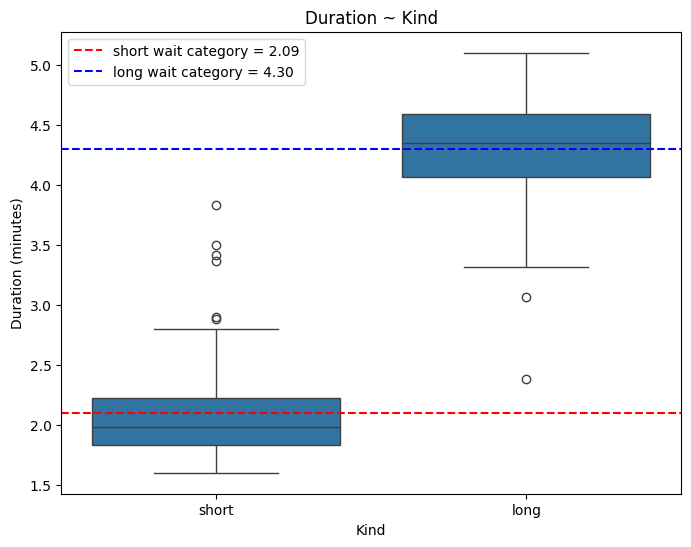

In [7]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

# Load the Old Faithful dataset
old_faithful = sns.load_dataset('geyser')

# Fit the model
model = smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit()

# Display the summary table
display(model.summary().tables[1])

# Print the model parameters to check their names
print("Model Parameters:")
print(model.params)

# Extract the intercept
beta_intercept = model.params['Intercept']

# Extract the contrast coefficient (check the printed names)
# Try accessing it dynamically instead of hardcoding
beta_contrast_name = model.params.index[1]  # Get the second parameter (contrast for 'long')
beta_contrast = model.params[beta_contrast_name]  # Access the contrast coefficient

# Box plot visualization using Matplotlib and Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='kind', y='duration', data=old_faithful, order=['short', 'long'])
plt.title('Duration ~ Kind')
plt.xlabel('Kind')
plt.ylabel('Duration (minutes)')

plt.axhline(y=beta_intercept, color='red', linestyle='--', label='short wait category = {:.2f}'.format(beta_intercept))
plt.axhline(y=beta_intercept + beta_contrast, color='blue', linestyle='--', label='long wait category = {:.2f}'.format(beta_intercept + beta_contrast))

plt.legend()
plt.show()


As we can see, $β_{contrast}=2.20360$ which is much greater than $0$. Correspondingly, p-value is even less than 0.001 so there is a very strong evidence to reject $H_0$, no difference between groups.

## GPT's summary
- https://chatgpt.com/share/6722b1ec-f458-8006-95fd-69fb85a1aa65 (this conversation also includes another conversation since another one can't be shared due to ChatGPT's policy)